<center><img src="dice.png" alt="dice" style="align:center; width:300px"></center>

# The Numpy Random Package

[Official documentation](https://numpy.org/doc/stable/reference/random/index.html)

***

<br>

## Table of Contents

#### 1. Introduction

&nbsp;&nbsp;&nbsp;&nbsp; - [Project Objectives](#Objectives)<br>
&nbsp;&nbsp;&nbsp;&nbsp; - [Topic Introduction](#Intro)<br>

#### 2. Simple random data
&nbsp;&nbsp;&nbsp;&nbsp;[Integers](#Simple)

<br>
<a id="Topic-Introduction"></a>

## Introduction
***

Random number generation has many applications in the real world such as gambling, statistics, computer simulation, cryptography and any other area that produces a unpredicatable outcome. Applications that require maximum unpredictability such as security implementations, generally use hardware generators(HRNG) that generate actual random numbers. Also known as True Random Number Generators (TRNG), such a device generates random numbers via a physical process, such as radioactive decay or thermal noise in a semiconductor. Both instrinsically random processes as per quantum theory.[1][https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.110.9725&rep=rep1&type=pdf] However, for applications that do not rely on extremely unpredictable results, a process known as pseudorandom number generation is used. It is called psuedorandom 

Numpy's random package produces pseudorandom numbers by combining a BitGenerator, which produces a sequence of random bits (typically 32 or 64 bits) and a Generator, that converts the sequence into a sequence of numbers. The Generator conforms to a particular probability distribution ie., uniform, Normal or Binomial. [https://numpy.org/doc/stable/reference/random/index.html] accessed 2.11.21

<a id="RS-v-Gen"></a>

#### Random State vs Generator

Generator replaces the legacy version Random State, since being updated in version 1.17.0. Random State legacy version is still be used however, it is limited to a single bitGenerator. Generator has multiple bitGenerators - meaning many distinct probability distributions are available for use. A further benefit of Generator is that by default it utilises bits that are produced by PCG-64, a 28-bit execution of O’Neill’s permutation congruential generator, which provides great statistical algorithms for generating random numbers that are difficult to predict.[https://www.pcg-random.org/index.html] accessed 2.11.21

[1] RANDy - A True-Random Generator Based On Radioactive
Decay
Markus Rohe
(mail@markus-rohe.de)
Fortgeschrittenenpraktikum
Advisor: Ammar Alkassar
Security and Cryptography Research Group
Saarland University
SS 2003
### 

In [1]:
# Numerical arrays.
import numpy as np

# Plotting data.
import matplotlib.pyplot as plt

# Change default style sheet.
plt.style.use('fivethirtyeight')

# Change the default figure size.
plt.rcParams['figure.figsize'] = [12, 6]

<br>

## Construct a Generator

***

"The seed is given an integer value to ensure that the results of pseudo-random generation are reproducible. By re-using a seed value, the same sequence should be reproducible from run to run as long as multiple threads are not running. Reproducibility is a very important concept that ensures that anyone who re-runs the code gets the exact same outputs." [https://medium.com/geekculture/the-story-behind-random-seed-42-in-machine-learning-b838c4ac290a]

In [36]:
# Create a new generator with bitGenerator PCG64
# (& setting seed for reproducible results - DID NOT SET SEED)
rng = np.random.default_rng()

# Simple random data

This section introduces numpy's built-in functions for producing random numbers.
***

### Integers
***
<b>Method:</b><br>

`random.Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)`

The random integers range from low(inclusive) and high(exclusive). However, if endpoint is set to True low and high are inclusive. The returned integers are from the discrete uniform distribution meaning each n value has equal probability of being returned. 

In [39]:
# Produce random integer numbers.
rng.integers(low=0, high=10, size=5) # 0 (inclusive) to 10 (exclusive)

array([3, 2, 7, 5, 6])

In [40]:
# Generate array of floats
rng.random(size=10)

array([0.70667082, 0.58592062, 0.76803649, 0.46216699, 0.10979132,
       0.1059356 , 0.15159348, 0.01274678, 0.02339538, 0.71801266])

In [25]:
# Generate multiple array
multi_rand_floats = rng.random((5, 5))
multi_rand_floats

array([[0.80476436, 0.38747838, 0.2883281 , 0.6824955 , 0.13975248],
       [0.1999082 , 0.00736227, 0.78692438, 0.66485086, 0.70516538],
       [0.78072903, 0.45891578, 0.5687412 , 0.139797  , 0.11453007],
       [0.66840296, 0.47109621, 0.56523611, 0.76499886, 0.63471832],
       [0.5535794 , 0.55920716, 0.3039501 , 0.03081783, 0.43671739]])

<br>

## numpy.random.normal

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

***

In [6]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [7]:
# Look at the first ten items.
s[:10]

array([-0.05528777,  0.06538568, -0.05315025, -0.14483761, -0.04773084,
        0.16781933,  0.11133432, -0.03069492,  0.07616888, -0.04385483])

In [8]:
abs(mu - np.mean(s))

0.0035918670175354886

In [9]:
abs(sigma - np.std(s, ddof=1))

0.0020836627830666393

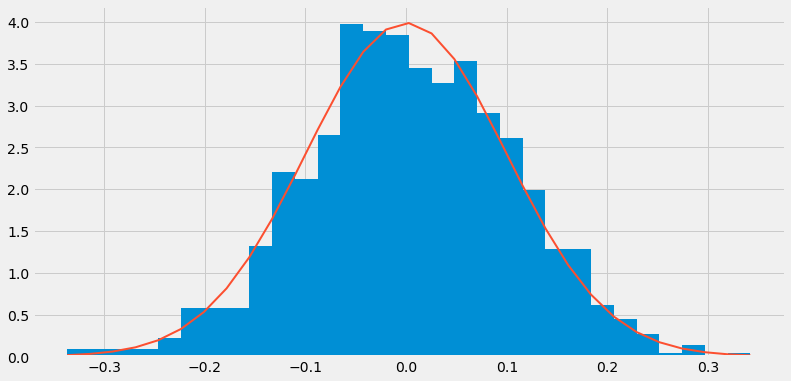

In [10]:
count, bins, ignored = plt.hist(s, 30, density=True)
f = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2/(2 * sigma**2))
plt.plot(bins, f, linewidth=2)
plt.show()

<br>

## Rolling dice

***

Roll a single dice.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

In [11]:
# Pick a random integer between 1 (inclusive) and 7 (exclusive).
np.random.randint(1, 7)

5

Roll several dice.

In [12]:
runs = 10000

In [13]:
# Pick many random integers between 1 (inclusive) and 7 (exclusive).
dice = np.random.randint(1, 7, runs)

In [14]:
# See the values.
print(dice)

[5 6 6 ... 2 1 6]


<br>

Plot the dice rolls

https://numpy.org/doc/stable/reference/generated/numpy.unique.html

***

In [15]:
# Count the number of times each face appears.
faces, counts = np.unique(dice, return_counts=True)
faces, counts

(array([1, 2, 3, 4, 5, 6]), array([1695, 1623, 1701, 1642, 1703, 1636]))

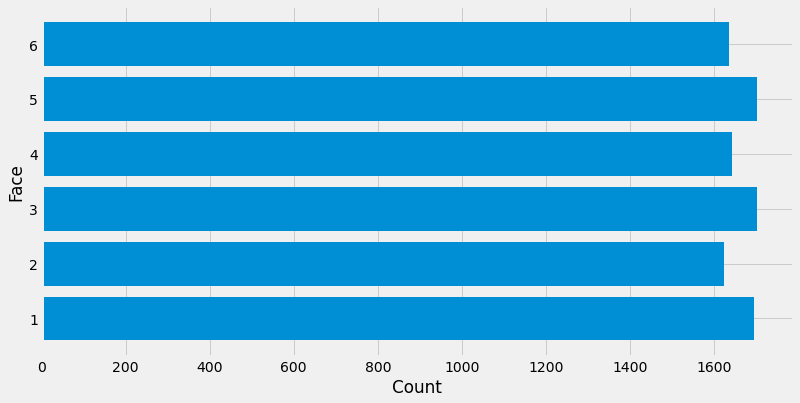

In [16]:
# Create a new plot.
fig, ax = plt.subplots()
# Bar chart.
ax.barh(faces, counts)
# Set axis labels.
ax.set_ylabel('Face')
ax.set_xlabel('Count');

<br>

## Roll more than one dice

***

In [17]:
# The number of dice to roll in each turn.
nodice = 2
# The number of turns.
noturns = 10000
# Roll the dice.
dice = np.random.randint(1, 7, (noturns, nodice))
# Have a look.
dice

array([[2, 5],
       [6, 2],
       [6, 2],
       ...,
       [1, 5],
       [4, 2],
       [3, 1]])

In [18]:
# Sum the faces of the dice.
totals = np.sum(dice, axis=1)
# Have a look.
totals

array([7, 8, 8, ..., 6, 6, 4])

In [19]:
# Count the number of times each face appears.
faces, counts = np.unique(totals, return_counts=True)
faces, counts

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 260,  548,  837, 1151, 1366, 1710, 1426, 1091,  832,  501,  278]))

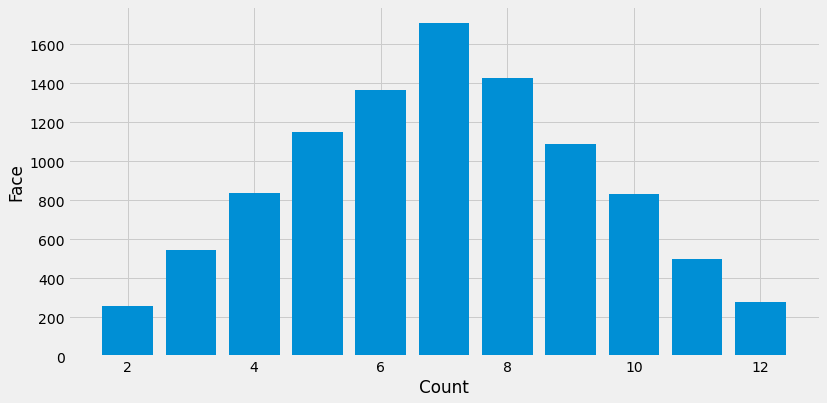

In [20]:
# Create a new plot.
fig, ax = plt.subplots()
# Bar chart.
ax.bar(faces, counts)
# Set axis labels.
ax.set_ylabel('Face')
ax.set_xlabel('Count');

<br>

## Lots of dice

***

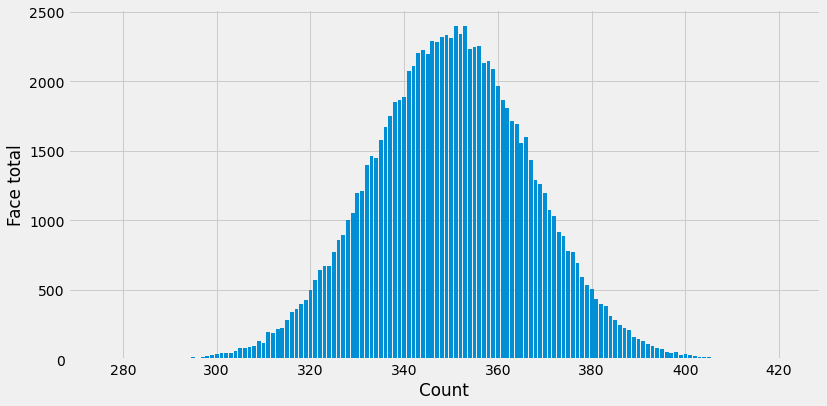

In [21]:
# The number of dice to roll in each turn.
nodice = 100
# The number of turns.
noturns = 100000
# Roll the dice.
dice = np.random.randint(1, 7, (noturns, nodice))
# Sum the faces of the dice.
totals = np.sum(dice, axis=1)
# Count the number of times each face appears.
faces, counts = np.unique(totals, return_counts=True)
# Create a new plot.
fig, ax = plt.subplots()
# Bar chart.
ax.bar(faces, counts)
# Set axis labels.
ax.set_ylabel('Face total')
ax.set_xlabel('Count');

## References

***

[1] https://www.datacamp.com/community/tutorials/numpy-random

***

## End